In [1]:
%pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Лабораторная работа №1: Первичное исследование данных

## 1. Постановка задачи

### Описание датасета
Представленный датасет содержит информацию об управлении запасами и жизненным циклом скоропортящихся товаров (молочная продукция, мясо, овощи и т.д.). Набор данных включает признаки, описывающие идентификатор товара, категорию, критические временные метки, условия хранения, а также экономические показатели: цену и текущий остаток на складе. Данные позволяют отслеживать свежесть продукции и эффективность складской логистики.

### Условный заказчик
Условным заказчиком данного анализа выступает отдел складской логистики или департамент контроля качества крупной розничной сети. Полученные выводы необходимы для минимизации убытков от списания просроченной продукции и оптимизации условий хранения товаров в различных категориях.

### Возможные задачи ИАД
1. Описательная аналитика и профилирование групп: Выявление категорий товаров с самыми короткими сроками реализации и анализ распределения запасов по складам. Например, определение того, какие группы товаров чаще всего оказываются в избытке при приближении даты истечения срока годности.
2. Сегментация объектов: Классификация товаров по «индексу оборачиваемости» и уровню риска порчи для выделения приоритетных групп, требующих немедленной распродажи или перераспределения.
3. Поиск аномалий: Выявление партий товара, для которых зафиксированы критические отклонения в условиях хранения (температура или влажность). Это позволяет предотвратить реализацию испорченной продукции до того, как она попадет на полки.

## 2. Паспорт датасета

### Загрузка данных

In [3]:
import pandas as pd

df = pd.read_csv('../data/perishablegm.csv')

rows, cols = df.shape
print(f"Количество строк: {rows}")
print(f"Количество столбцов: {cols}")
df.head()

Количество строк: 100000
Количество столбцов: 42


,record_id,product_id,product_name,category,store_id,region,supplier_id,transaction_date,expiration_date,shelf_life_days,...,selling_price,units_sold,units_wasted,waste_pct,revenue,waste_cost,profit,profit_margin_pct,supplier_score,is_promoted
0,1,BAK_DON_743,Donuts,Bakery,STORE_046,West,SUPPLIER_03,2024-09-25,2024-09-29,4,...,2.60,138,20,12.7,358.80,24.40,166.04,46.3,9,0
1,2,MEA_SAU_338,Sausages,Meat,STORE_030,Southwest,SUPPLIER_12,2023-04-14,2023-04-21,9,...,8.25,251,102,28.9,2070.75,426.36,595.21,28.7,6,0
2,3,BAK_BAG_799,Bagels,Bakery,STORE_035,Midwest,SUPPLIER_08,2024-10-25,2024-10-27,2,...,1.28,483,0,0.0,618.24,0.00,-405.72,-65.6,9,0
3,4,PHA_VAC_801,Vaccines,Pharmaceuticals,STORE_003,Midwest,SUPPLIER_11,2023-11-29,2024-02-17,87,...,209.56,477,0,0.0,99960.12,0.00,57988.89,58.0,6,0
4,5,REA_FRE_422,Fresh Pasta,Ready_to_Eat,STORE_042,West,SUPPLIER_15,2023-08-06,2023-08-09,4,...,5.28,391,0,0.0,2064.48,0.00,879.75,42.6,6,0


### Структура данных

In [5]:
# columns and types
df.info()

# statistics by numerical 
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   record_id                   100000 non-null  int64  
 1   product_id                  100000 non-null  str    
 2   product_name                100000 non-null  str    
 3   category                    100000 non-null  str    
 4   store_id                    100000 non-null  str    
 5   region                      100000 non-null  str    
 6   supplier_id                 100000 non-null  str    
 7   transaction_date            100000 non-null  str    
 8   expiration_date             100000 non-null  str    
 9   shelf_life_days             100000 non-null  int64  
 10  days_remaining_at_purchase  100000 non-null  int64  
 11  storage_temp                100000 non-null  float64
 12  temp_deviation              100000 non-null  float64
 13  base_price                

,record_id,shelf_life_days,days_remaining_at_purchase,storage_temp,temp_deviation,base_price,cost_price,initial_quantity,spoilage_sensitivity,day_of_week,...,selling_price,units_sold,units_wasted,waste_pct,revenue,waste_cost,profit,profit_margin_pct,supplier_score,is_promoted
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,67.169300,56.114940,3.127054,1.597402,36.408563,20.05853,254.851800,0.685802,3.001080,...,34.356048,202.835650,52.016150,22.591979,5911.547597,1632.244932,797.837098,13.394057,8.207760,0.148980
std,28867.657797,140.550322,118.160892,9.503199,1.206793,87.424777,48.89381,141.686286,0.215392,2.000745,...,85.381541,138.942464,79.279844,28.717231,19277.611250,8275.432747,11331.288655,46.246729,1.397525,0.356071
min,1.000000,1.000000,0.000000,-27.700000,0.000000,1.000000,0.41000,10.000000,0.300000,0.000000,...,0.260000,0.000000,0.000000,0.000000,0.000000,0.000000,-169495.000000,-1798.800000,6.000000,0.000000
25%,25000.750000,5.000000,4.000000,1.100000,0.600000,6.270000,3.36000,132.000000,0.500000,1.000000,...,5.320000,85.000000,0.000000,0.000000,542.880000,0.000000,-48.460000,0.000000,7.000000,0.000000
50%,50000.500000,9.000000,8.000000,4.000000,1.400000,10.220000,5.58000,255.000000,0.750000,3.000000,...,8.800000,193.000000,15.000000,12.400000,1450.420000,62.505000,276.700000,26.300000,9.000000,0.000000
75%,75000.250000,24.000000,20.000000,6.600000,2.300000,17.010000,9.50000,377.000000,0.900000,5.000000,...,15.450000,309.000000,80.000000,30.800000,3170.720000,431.660000,992.677500,41.100000,9.000000,0.000000
max,100000.000000,730.000000,723.000000,27.700000,9.000000,499.980000,346.61000,500.000000,0.950000,6.000000,...,499.980000,500.000000,500.000000,100.000000,246243.640000,169495.000000,136195.210000,60.300000,10.000000,1.000000


## 3. Аудит качества данных

### 3.1. Пропуски

Статистика пропусков:
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


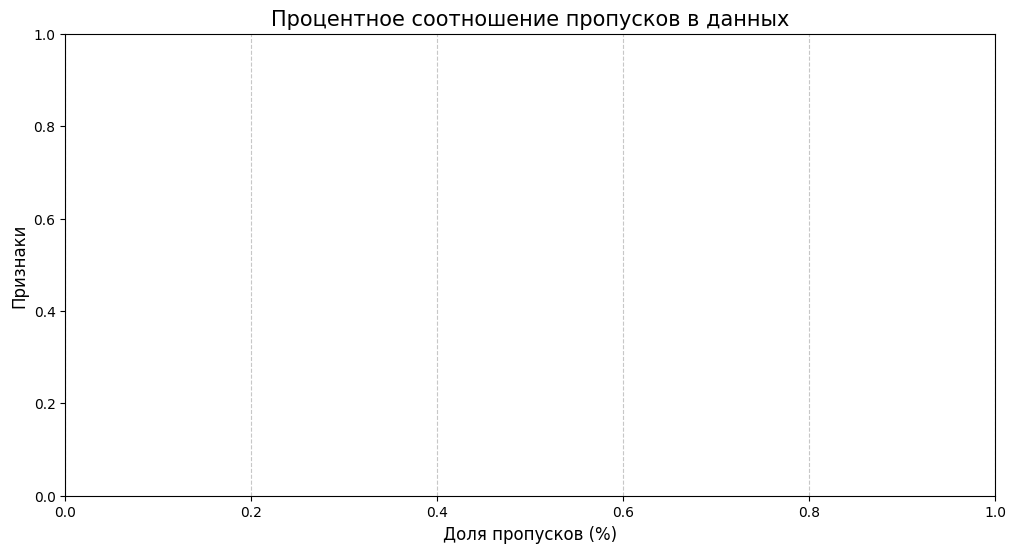

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Количество и процент пропусков 
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Отчетная таблица
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2)
}).sort_values(by='Missing Values', ascending=False)

# Фильтруем 
missing_only = missing_report[missing_report['Missing Values'] > 0]

# Таблица
print("Статистика пропусков:")
print(missing_only)

# Визуализация 
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_only['Percentage (%)'], y=missing_only.index, palette='viridis')

plt.title('Процентное соотношение пропусков в данных', fontsize=15)
plt.xlabel('Доля пропусков (%)', fontsize=12)
plt.ylabel('Признаки', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Вывод по 3.1: Пропусков не обнаружено

### 3.2. Дубликаты

In [ ]:
# Полные дубликаты
total_duplicates = df.duplicated().sum()

# Дубликаты по ключевым полям
key_duplicates = df.duplicated(subset=['product_id', 'transaction_date']).sum()

print(f"Количество полных дубликатов: {total_duplicates}")
print(f"Количество дубликатов по паре 'product_id + transaction_date': {key_duplicates}")

Количество полных дубликатов: 0
Количество дубликатов по паре 'product_id + transaction_date': 136


### 3.3 Типические проблемы значений
Для числовых признаков рассчитаем статистику, а для категориальных — количество уникальных значений и наличие «грязи»[cite: 85, 88].

In [18]:
numeric_stats = df[['base_price', 'cost_price', 'initial_quantity', 'units_sold', 'profit']].describe()
print("Базовая статистика:")
display(numeric_stats)

suspicious = (df[['base_price', 'cost_price', 'initial_quantity', 'units_sold', 'profit']] < 0).any().any()
print(f"Наличие отрицательных значений: {suspicious}")

print("\nУникальные категории:")
for col in ['region', 'quality_grade']:
    print(f"{col}: {df[col].nunique()} (примеры: {df[col].unique()[:5]})")

Базовая статистика:


,base_price,cost_price,initial_quantity,units_sold,profit
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,36.408563,20.05853,254.851800,202.835650,797.837098
std,87.424777,48.89381,141.686286,138.942464,11331.288655
min,1.000000,0.41000,10.000000,0.000000,-169495.000000
25%,6.270000,3.36000,132.000000,85.000000,-48.460000
50%,10.220000,5.58000,255.000000,193.000000,276.700000
75%,17.010000,9.50000,377.000000,309.000000,992.677500
max,499.980000,346.61000,500.000000,500.000000,136195.210000


Наличие отрицательных значений: True

Уникальные категории:
region: 5 (примеры: <StringArray>
['West', 'Southwest', 'Midwest', 'Northeast', 'Southeast']
Length: 5, dtype: str)
quality_grade: 3 (примеры: <StringArray>
['A', 'B', 'C']
Length: 3, dtype: str)


### 3.3. Выбросы


Количество выбросов: 15756


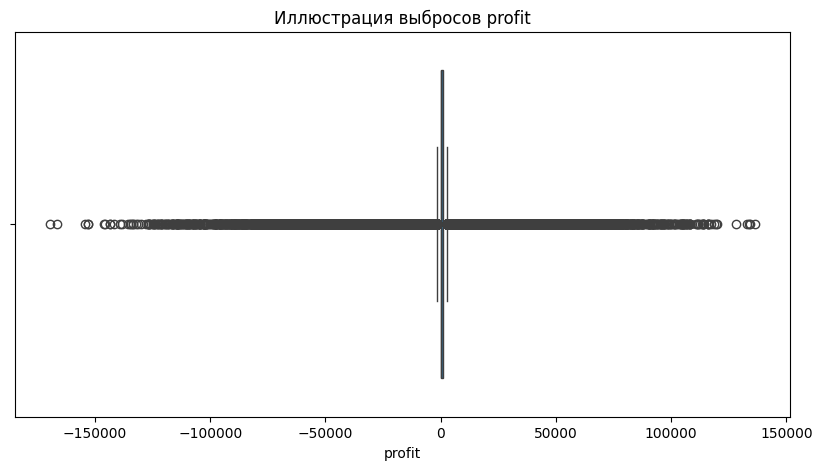

In [19]:
Q1 = df['profit'].quantile(0.25)
Q3 = df['profit'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers_df = df[(df['profit'] < lower_limit) | (df['profit'] > upper_limit)]
print(f"Количество выбросов: {len(outliers_df)}")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['profit'])
plt.title('Иллюстрация выбросов profit')
plt.show()

## 4. Разведочный анализ (EDA)

### 4.1. Распределение мировых продаж.

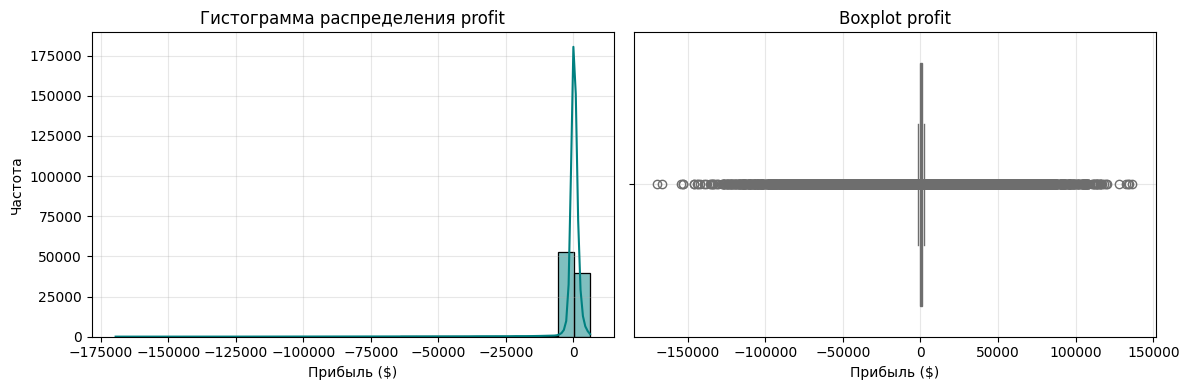

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_col = 'profit'

plt.figure(figsize=(12, 4))

# Гистограмма и KDE
plt.subplot(1, 2, 1)
# Ограничим для наглядности - найдем 95-й перцентиль для устранения крайних выбросов
upper_limit = df[numeric_col].quantile(0.95)
sns.histplot(df[df[numeric_col] < upper_limit][numeric_col], kde=True, color='teal', bins=30)
plt.title(f'Гистограмма распределения {numeric_col}')
plt.xlabel('Прибыль ($)')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df[numeric_col], color='lightcoral')
plt.title(f'Boxplot {numeric_col}')
plt.xlabel('Прибыль ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Что видно: Распределение прибыли имеет сильную правостороннюю асимметрию, подавляющее большинство транзакций имеют небольшую или умеренную прибыль, в то время как на boxplot видна длинная череда выбросов - это отдельные высокоприбыльные товары или категории.

Гипотеза: Бизнес по продаже скоропортящихся товаров имеет неравномерное распределение прибыли: основная прибыль генерируется небольшим процентом товаров/транзакций.

Вопрос: Какие именно факторы (категория товара, регион, поставщик, условия хранения позволяют товару генерировать аномально высокую прибыль или, наоборот, приводить к убыткам?

### 4.2. Анализ категориального признака

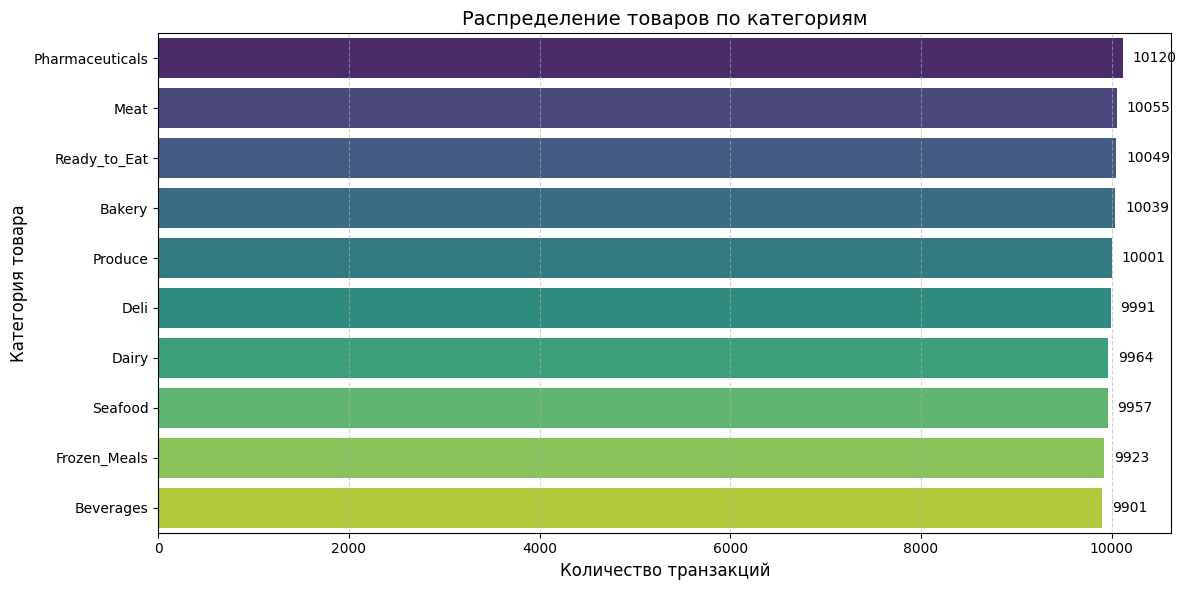

In [15]:
cat_col = 'category'

plt.figure(figsize=(12, 6))
# Подсчет всех категорий (или топ-N)
category_counts = df[cat_col].value_counts()

# Построение столбчатой диаграммы
sns.barplot(x=category_counts.values, y=category_counts.index, 
            hue=category_counts.index, palette='viridis', legend=False)

plt.title(f'Распределение товаров по категориям', fontsize=14)
plt.xlabel('Количество транзакций', fontsize=12)
plt.ylabel('Категория товара', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Добавляем значения на столбцы
for i, v in enumerate(category_counts.values):
    plt.text(v + max(category_counts.values)*0.01, i, str(v), 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

Что видно: Фармацевтические товары значительно преобладают по количеству транзакций в датасете, за ними следуют мясные продукты (Meat) и бакалея (Bakery). Наименьшее количество транзакций наблюдается в категориях готовой еды (Ready_to_Eat) и напитков (Beverages).

Гипотеза: Фармацевтические товары требуют более строгого учета и контроля из-за высокой стоимости, сроков годности и регулирующих требований, что приводит к большему количеству транзакций.

Вопрос: Существует ли зависимость между категорией товара и ключевыми бизнес-показателями: уровнем прибыльности (profit margin), процентом утилизации (waste percentage) и риском порчи (spoilage risk)?

### 4.3. Визуализация зависимости между двумя признаками

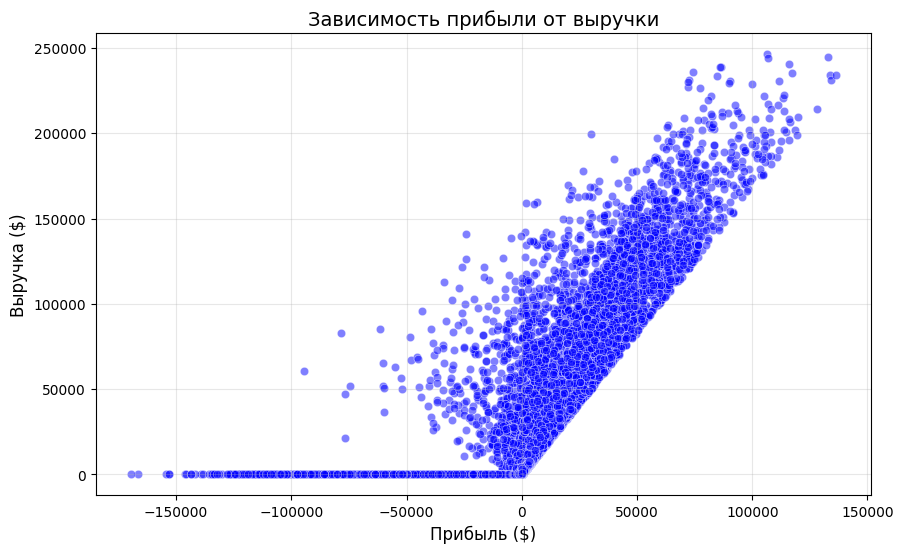

In [17]:
plt.figure(figsize=(10, 6))

# Строим диаграмму рассеяния для двух регионов
sns.scatterplot(data=df, x='profit', y='revenue', alpha=0.5, color='blue')

plt.title('Зависимость прибыли от выручки', fontsize=14)
plt.xlabel('Прибыль ($)', fontsize=12)
plt.ylabel('Выручка ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Что видно: Наблюдается положительная корреляция между прибылью и выручкой — чем выше выручка, тем, как правило, выше прибыль. Однако есть много точек с высокой выручкой, но низкой или даже отрицательной прибылью.

Гипотеза: Высокая выручка не всегда гарантирует высокую прибыль из-за возможных больших затрат (стоимость товара, утилизация, логистика).

Вопрос: Какие факторы (категория товара, процент утилизации, условия хранения) объясняют случаи, когда при высокой выручке наблюдается низкая или отрицательная прибыль?

## 5. Выводы

Файл `report/quality_report.md`